In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
data_path = '../russell_protein/protein_mpnn/tests/fixtures/pdb_2021aug02_sample'

import sys
sys.path.append('../')

from russell_protein.protein_mpnn.dataset import (
    AnishchankoMultiChainDataset,
    build_protein_mpnn_input_structure_dict
)

from russell_protein.protein_mpnn.visualize import (
    data_to_pdb
)

In [ ]:
ds = AnishchankoMultiChainDataset(
    'valid',
    data_path,
)

avail_data = []
for x in range(len(ds)):
    try:
        data = ds[x]
        avail_data.append(data)
    except Exception as e:
        continue


tensor([0, 1], dtype=torch.int32)
tensor([0, 1], dtype=torch.int32)
tensor([0, 1, 2, 3], dtype=torch.int32)
tensor([0, 1, 2, 3], dtype=torch.int32)
tensor([0, 1, 2, 3], dtype=torch.int32)
tensor([0, 1, 2, 3], dtype=torch.int32)
tensor([0, 1], dtype=torch.int32)
tensor([0, 1], dtype=torch.int32)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)
tensor([0, 1, 2, 3, 4, 5], dtype=torch.int32)


/Users/rmcl/Documents/PhD/development/protein-mpnn-explore/notebooks/../russell_protein/protein_mpnn/dataset.py:138: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  meta = tor

4

In [7]:
avail_data[0].keys()
len(avail_data[0]['seq_chain_A']), avail_data[0]['coords_chain_A']['N_chain_A'].shape

(550, torch.Size([550, 3]))

In [21]:
input_dict = build_protein_mpnn_input_structure_dict(avail_data[0])
input_dict.keys(), input_dict['num_of_chains']

tensor([0, 1], dtype=torch.int32)
tensor([0, 1], dtype=torch.int32)


(dict_keys(['name', 'num_of_chains', 'seq_chain_A', 'coords_chain_A', 'seq_chain_B', 'coords_chain_B', 'masked_list', 'visible_list', 'seq']),
 2)

In [19]:
input_dict['seq_chain_A'], input_dict['seq_chain_B'], input_dict['seq'], input_dict['visible_list']

('PSETPQAEVGPTGCPHRSGPHSAKGSLEKGSPEDKEAKEPLWIRPDAPSRCTWQLGRPASESPHHHTAPAKSPKILPDILKKIGDTPMVRINKIGKKFGLKCELLAKCEFFNAGGSVKDRISLRMIEDAERDGTLKPGDTIIEPTSGNTGIGLALAAAVRGYRCIIVMPEKMSSEKVDVLRALGAEIVRTPTNARFDSPESHVGVAWRLKNEIPNSHILDQYRNASNPLAHYDTTADEILQQCDGKLDMLVASVGTGGTITGIARKLKEKCPGCRIIGVDPEGSILAEPEELNQTEQTTYEVEGIGYDFIPTVLDRTVVDKWFKSNDEEAFTFARMLIAQEGLLCGGSAGSTVAVAVKAAQELQEGQRCVVILPDSVRNYMTKFLSDRWMLQKGFLKEEDLTEKKPWWWHLRVQELGLSAPLTVLPTITCGHTIEILREKGFDQAPVVDEAGVILGMVTLGNMLSSLLAGKVQPSDQVGKVIYKQFKQIRLTDTLGRLSHILEMDHFALVVHEQIQYHSTGKSSQRQMVFGVVTAIDLLNFVAAQERDQK',
 'PSETPQAEVGPTGCPHRSGPHSAKGSLEKGSPEDKEAKEPLWIRPDAPSRCTWQLGRPASESPHHHTAPAKSPKILPDILKKIGDTPMVRINKIGKKFGLKCELLAKCEFFNAGGSVKDRISLRMIEDAERDGTLKPGDTIIEPTSGNTGIGLALAAAVRGYRCIIVMPEKMSSEKVDVLRALGAEIVRTPTNARFDSPESHVGVAWRLKNEIPNSHILDQYRNASNPLAHYDTTADEILQQCDGKLDMLVASVGTGGTITGIARKLKEKCPGCRIIGVDPEGSILAEPEELNQTEQTTYEVEGIGYDFIPTVLDRTVVDKWFKSNDEEAFTFARMLIAQEGLLCGGSAGSTVAVAVKAAQELQEGQRCVVILPDSVRNYMTKFLSDRWMLQKGFLKEEDLTEKKPWWWHLRVQELGLSAPLTVLPTITCGHTIEILREKGFD

In [ ]:
from torch.utils.data import Dataset


# TODO: is this right?
ALLOWED_AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWYX'

class FilteredPDBDataset(Dataset):
    def __init__(
        self,
        data,
        max_sequence_length : int = 1000
    ):

        allowed_symbols = set(ALLOWED_AMINO_ACIDS)
        self.data = []

        for d in data:
            # if the sequence is None, skip this entry
            if d['seq'] is None or len(d['seq']) == 0:
                continue

            # if every symbol in the sequence is not in the allowed set, skip this entry
            if not set(d['seq']).issubset(allowed_symbols):
                continue

            if len(d['seq']) > max_sequence_length:
                continue

            self.data.append(d)


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [10]:

avail_data[1]['chains'][0]['seq'], avail_data[1]['chains'][0]['xyz'].shape, avail_data[1]['chains'][0]['xyz'][:-6,:,:].shape

('MASMTGGQQMGRGSDYFEPQQQQQQQQQQPQGASTPKVFVGYSIYKGKAALTVEPRSPEFSPLDSGAFKLSREGMVMLQFAPAAGVRQYDWSRKQVFSLSVTEIGSIISLGTKDSCEFFHDPNKGRSDEGRVRKVLKVEPLPDGSGHFFNLSVQNKLINLDENIYIPVTKAEFAVLVSAFNFVMPYLLGWHTAVNSFKPEDASRSNNANPRSGAELEWNLEHHHHHH',
 torch.Size([227, 14, 3]),
 torch.Size([221, 14, 3]))

In [17]:
!conda install -y -c conda-forge biopython

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.5.0
  latest version: 24.11.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.2



## Package Plan ##

  environment location: /Users/rmcl/Documents/PhD/development/protein-mpnn-explore/.conda

  added / updated specs:
    - biopython


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.84             |  py311hd3f4193_0         3.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  biopython          conda-forge/osx-arm64::biopython-1.84-py311hd3f4193_0 



                                                   

torch.Size([2968, 3])


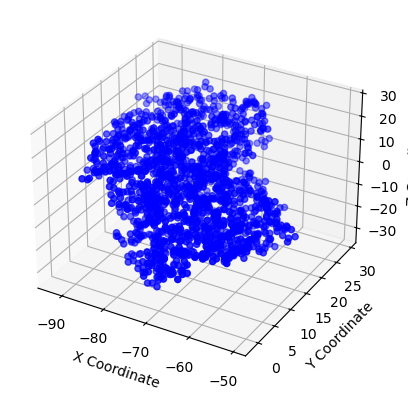

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

coords = avail_data[2]['chains'][0]['xyz']
xyz_coords = coords.view(-1, 3)  # Shape [212 * 14, 3]
print(xyz_coords.shape)  # Should print [2968, 3]


# Split into x, y, z
x = xyz_coords[:, 0]
y = xyz_coords[:, 1]
z = xyz_coords[:, 2]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')  # Customize marker and color if needed

# Label axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [29]:
data_to_pdb(avail_data[2], "output.pdb")

PDB file saved to output.pdb


'6l33'

In [28]:
import nglview as nv

data_to_pdb(avail_data[3], "output.pdb")

view = nv.show_structure_file("output.pdb")
view

NGLWidget()

In [25]:
import torch
import numpy as np
torch.any(torch.isnan(torch.tensor([np.nan, np.nan, np.nan])))

tensor(True)

In [58]:
len(avail_data[1]['seq_chain_A']), np.array(avail_data[1]['coords_chain_A']['N_chain_A']).shape

(227, (227, 3))